## `Module` - Geospatial Analysis
### `Task 1.1`: Application of Python-based geospatial visualisation tool (e.g., GeoPandas) on a real world dataset

In [ ]:
# installing All necessary libraries
!pip install geopandas
!pip install geopandas

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
pd.set_option('display.max_columns', None)

#### Reading the datasets

In [ ]:
# Reading the Dataset File in csv format  
df_atm = pd.read_csv("ATM.csv",skiprows = 4)  # Skipping the starting 4 rows of data as it's empty
df_pop = pd.read_csv("POP.csv",skiprows = 4)  # Skipping the starting 4 rows of data as it's empty

# Checking the shape/dimensions of the population data
print(df_pop.shape)

# Checking the shape/dimensions of the GDP data
print(df_atm.shape)

(266, 67)
(264, 66)


In [ ]:
df_atm.head(5)

Country Name Country Code  \
0        Aruba          ABW   
1  Afghanistan          AFG   
2       Angola          AGO   
3      Albania          ALB   
4      Andorra          AND   

                                      Indicator Name     Indicator Code  1960  \
0  Total greenhouse gas emissions (kt of CO2 equi...  EN.ATM.GHGT.KT.CE   NaN   
1  Total greenhouse gas emissions (kt of CO2 equi...  EN.ATM.GHGT.KT.CE   NaN   
2  Total greenhouse gas emissions (kt of CO2 equi...  EN.ATM.GHGT.KT.CE   NaN   
3  Total greenhouse gas emissions (kt of CO2 equi...  EN.ATM.GHGT.KT.CE   NaN   
4  Total greenhouse gas emissions (kt of CO2 equi...  EN.ATM.GHGT.KT.CE   NaN   

   1961  1962  1963  1964  1965  1966  1967  1968  1969          1970  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     42.306298   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  14306.616300   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  60648.601080   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   6960.868200   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN           NaN   

           1971          1972         1973          1974          1975  \
0     42.786948     43.286613     43.72459     44.130957     44.481908   
1  14391.778200  13040.848000  13535.75410  14945.968200  14574.164000   
2  39162.171430  42205.650700  44252.66912  40179.233500  44429.300030   
3   6950.036100   7613.266100   7348.49210   7632.664300   7873.037000   
4           NaN           NaN          NaN           NaN           NaN   

           1976          1977          1978          1979          1980  \
0    131.633746    135.055319    358.990001    409.505485    424.783771   
1  14746.851000  15247.281000  15112.318000  14923.075000  15691.266000   
2  38448.024090  43563.412180  46235.114580  56644.651970  48001.866160   
3   8470.978400   8948.980900   9996.056200  11248.358300  11433.584200   
4           NaN           NaN           NaN           NaN           NaN   

           1981          1982          1983          1984          1985  \
0    519.001013    564.023574    530.385687    571.038292    642.147964   
1  15810.335000  15615.333000  15322.530000  14278.792100  13545.736900   
2  41894.794960  45243.802080  44852.060320  35878.300780  36714.190830   
3  10520.362500  10730.526100  11567.573700  12215.237500  11821.583100   
4           NaN           NaN           NaN           NaN           NaN   

          1986          1987        1988         1989          1990  \
0    435.85886    616.928696         NaN          NaN           NaN   
1  12269.46240  12400.507300  12959.2948  12348.95700  12528.016500   
2  35982.41365  46721.257740  35736.7658  39342.98618  50806.542691   
3  12079.10500  12175.483200  12603.8867  12552.73690  11112.729560   
4          NaN           NaN         NaN          NaN           NaN   

           1991         1992         1993          1994          1995  \
0           NaN          NaN          NaN           NaN           NaN   
1  12307.063800  11370.45310  11390.87480  11290.688200  11635.659400   
2  43761.081269  64997.83986  39775.10719  44657.243349  48230.298638   
3   8273.632400   6227.15320   6067.17990   6793.796300   6421.571300   
4           NaN          NaN          NaN           NaN           NaN   

           1996         1997        1998        1999        2000        2001  \
0           NaN          NaN         NaN         NaN         NaN         NaN   
1  12505.930800  13343.25000  13793.3670  14812.3660  13530.9530  12585.4020   
2  47136.215785  33091.22462  35275.1251  36119.4252  34780.6811  34371.8411   
3   6187.384100   5500.60700   5246.1311   6493.4872   8389.2767   6820.6244   
4           NaN          NaN         NaN         NaN         NaN         NaN   

          2002        2003         2004        2005         2006        2007  \
0          NaN         NaN          NaN         NaN          NaN         NaN   
1  13842.73810  14709.8840  14654.3

In [ ]:
df_pop.head(5)

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54208.0      55434.0      56234.0      56699.0      57029.0   
1  130836765.0  134159786.0  137614644.0  141202036.0  144920186.0   
2    8996967.0    9169406.0    9351442.0    9543200.0    9744772.0   
3   96396419.0   98407221.0  100506960.0  102691339.0  104953470.0   
4    5454938.0    5531451.0    5608499.0    5679409.0    5734995.0   

          1965         1966         1967         1968         1969  \
0      57357.0      57702.0      58044.0      58377.0      58734.0   
1  148769974.0  152752671.0  156876454.0  161156430.0  165611760.0   
2    9956318.0   10174840.0   10399936.0   10637064.0   10893772.0   
3  107289875.0  109701811.0  112195950.0  114781116.0  117468741.0   
4    5770573.0    5781305.0    5774440.0    5771973.0    5803677.0   

          1970         1971         1972         1973         1974  \
0      59070.0      59442.0      59849.0      60236.0      60527.0   
1  170257189.0  175100167.0  180141148.0  185376550.0  190800796.0   
2   11173654.0   11475450.0   11791222.0   12108963.0   12412960.0   
3  120269044.0  123184308.0  126218502.0  129384954.0  132699537.0   
4    5890360.0    6041239.0    6248965.0    6497283.0    6761623.0   

          1975         1976         1977         1978         1979  \
0      60653.0      60586.0      60366.0      60102.0      59972.0   
1  196409937.0  202205766.0  208193045.0  214368393.0  220740384.0   
2   12689164.0   12943093.0   13171294.0   13341199.0   13411060.0   
3  136173544.0  139813171.0  143615715.0  147571063.0  151663853.0   
4    7023994.0    7279630.0    7533814.0    7790774.0    8058112.0   

          1980         1981         1982         1983         1984  \
0      60097.0      60561.0      61341.0      62213.0      62826.0   
1  227305945.0  234058404.0  240999134.0  248146290.0  255530063.0   
2   13356500.0   13171679.0   12882518.0   12537732.0   12204306.0   
3  155882270.0  160223588.0  164689764.0  169279422.0  173991851.0   
4    8341290.0    8640478.0    8952971.0    9278104.0    9614756.0   

          1985         1986         1987         1988         1989  \
0      63024.0      62645.0      61838.0      61072.0      61033.0   
1  263161451.0  271050065.0  279184536.0  287524258.0  296024639.0   
2   11938204.0   11736177.0   11604538.0   11618008.0   11868873.0   
3  178826553.0  183785612.0  188868567.0  194070079.0  199382783.0   
4    9961993.0   10320116.0   10689247.0   11068051.0   11454784.0   

          1990         1991         1992         1993         1994  \
0      62152.0      64623.0      68240.0      72495.0      76705.0   
1  304648010.0  313394693.0  322270073.0  331265579.0  340379934.0   
2   12412311.0   13299016.0   14485543.0   15816601.0   17075728.0   
3  204803865.0  210332267.0  215976366.0  221754806.0  227692136.0   
4   11848385.0   12248901.0   12657361.0   13075044.0   13503753.0   

          1995         1996         1997         1998         1999  \
0      80324.0      83211.0      85450.0      87280.0      89009.0   
1  349605660.0  358953595.0  368440591.0  378098393.0  387977990.0   
2   18110662.0   18853444.0   19357126.0   19737770.0   20170847.0   
3  233807627.0  240114179.0  246613750.0  253302310.0  260170348.0   
4   13945205.0   14400722.0   14871572.0   15359600.0   15866871.0   

          2000         2001         2002         2003         2004  \
0      90866.0      92892.0      94992.0      97016.0      98744.0   
1  398113044.0  4085221

In [ ]:
df_atm.drop(['Unnamed: 65'], axis=1, inplace=True)
df_pop.drop(['Unnamed: 66'], axis=1, inplace=True)

col_list = list(df_atm.columns)
col_list.remove('Country Name')
col_list.remove('Country Code')
col_list.remove('Indicator Name')
col_list.remove('Indicator Code')


for year in col_list:
    df_atm.rename(columns = {year:int(eval(year))}, inplace = True)  
    df_pop.rename(columns = {str(int(eval(year))):int(eval(year))}, inplace = True)

In [ ]:
# Creating copy of the Country Name and Country Code 
df = df_atm[['Country Name', 'Country Code']].copy()

#Displaying the Created Dataframe
df

Country Name Country Code
0           Aruba          ABW
1     Afghanistan          AFG
2          Angola          AGO
3         Albania          ALB
4         Andorra          AND
..            ...          ...
259        Kosovo          XKX
260   Yemen, Rep.          YEM
261  South Africa          ZAF
262        Zambia          ZMB
263      Zimbabwe          ZWE

[264 rows x 2 columns]

###  `Task 1.2` -  Analysis of geospatial dataset

### `Data Preprocessing` 


#### 1.2.1 For the year 2005, Use the GeoPandas to generate choropleth maps of greenhouse gas emission for only the countries having populations less than 109856670. Very briefly interpret the generated map.



Reading the dataset provided by the Geopandas to get information about latitude and longitude to plot

- To plot Choropleth Maps geopanda uses geometry which is basically a latitude and longitude value to get that 
- we need to use dataset which contains this info, so we used naturalearth_lowres and done inner join with our data so in common we got 165 countries that we used to plot a map  


In [ ]:
# Using the dataset naturalearth_lowres' which comes default with geopanda 
# The dataset provided by geopanda has the correct data which can be compared with the present dataset 
# The 'naturalearth_lowres' dataset also contains the 'Geometry' which is a necessary value for generating maps 
# Load the shapefile data for the world map

world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map.head()
world_map.shape

(177, 6)

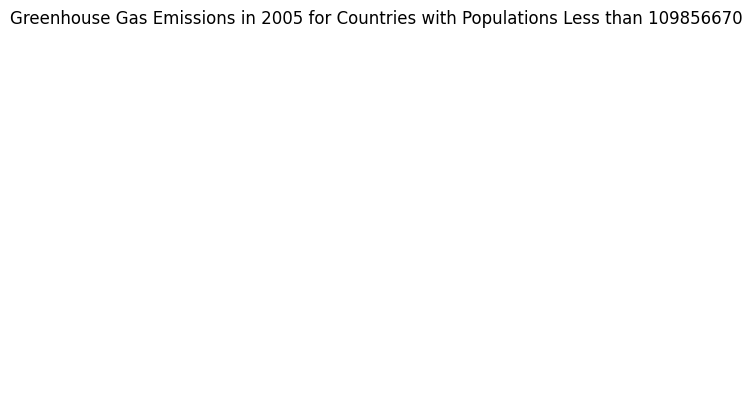

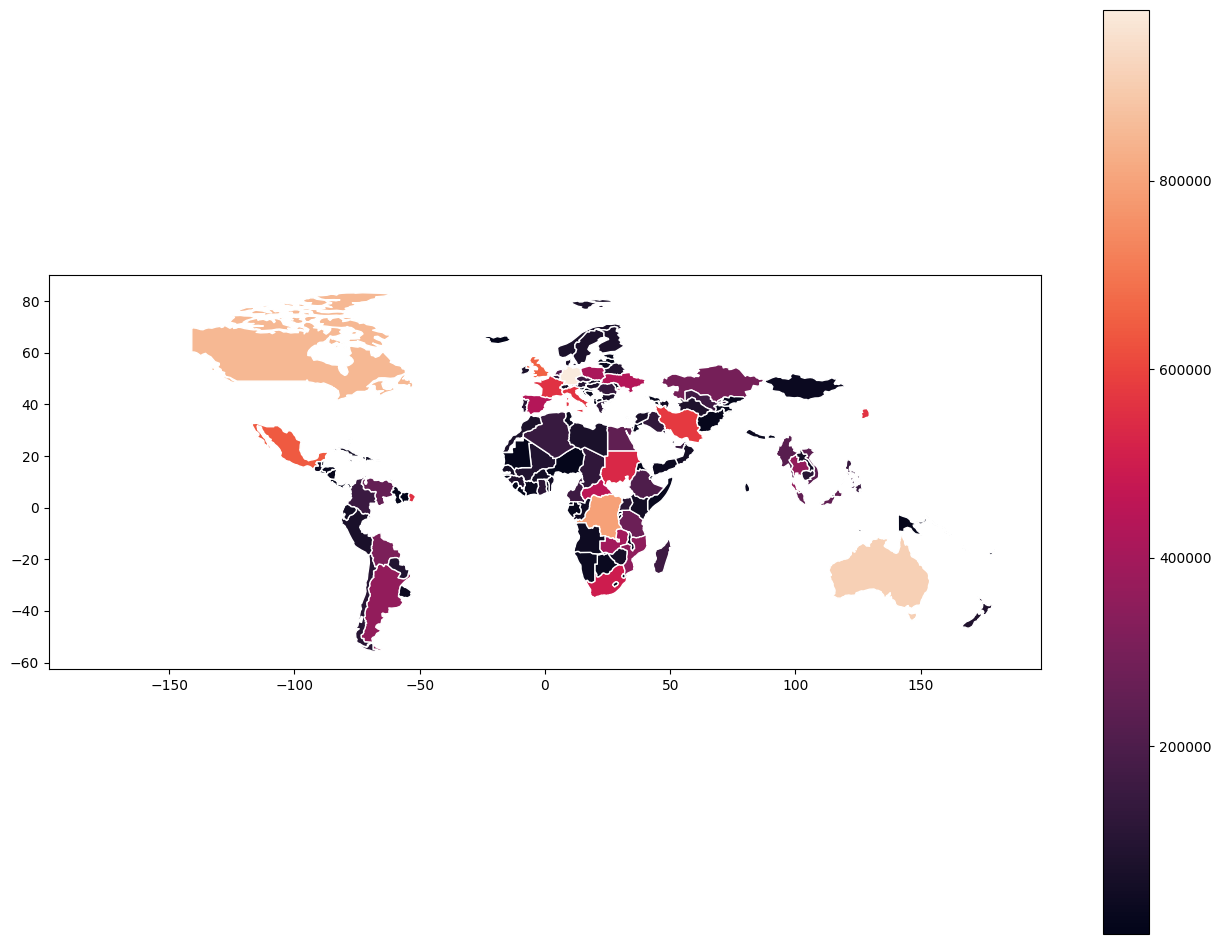

In [ ]:
# Filter the population data to include only countries with populations less than 109856670
df_pop_filtered = df_pop[df_pop[2005] < 109856670]

# Merge the filtered population data with the greenhouse gas emissions data for the year 2005
df_merged = pd.merge(df_pop_filtered[['Country Name', 'Country Code']], df_atm[['Country Name', 2005]], on='Country Name')

# Read in the shapefile data for the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the shapefile data with the merged data on the country code
merged = world.merge(df_merged, left_on='iso_a3', right_on='Country Code')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Greenhouse Gas Emissions in 2005 for Countries with Populations Less than 109856670')
merged.plot(column=2005, figsize=(16, 12), legend = True, cmap='rocket', edgecolor="white");
plt.show()


In [ ]:
merged.sort_values(by=[2005]).head(5)

pop_est      continent         name iso_a3  gdp_md_est  \
81   299882.0        Oceania      Vanuatu    VUT         934   
18  1293119.0           Asia  Timor-Leste    TLS        2017   
89   763092.0           Asia       Bhutan    BTN        2530   
0    889953.0        Oceania         Fiji    FJI        5496   
32   390353.0  North America       Belize    BLZ        1879   

                                             geometry Country Name  \
81  MULTIPOLYGON (((167.21680 -15.89185, 167.84488...      Vanuatu   
18  POLYGON ((124.96868 -8.89279, 125.08625 -8.656...  Timor-Leste   
89  POLYGON ((91.69666 27.77174, 92.10371 27.45261...       Bhutan   
0   MULTIPOLYGON (((180.00000 -16.06713, 180.00000...         Fiji   
32  POLYGON ((-89.14308 17.80832, -89.15091 17.955...       Belize   

   Country Code        2005  
81          VUT   436.13738  
18          TLS   885.58214  
89          BTN  1617.86441  
0           FJI  1836.06990  
32          BLZ  2022.18417

### Interpretation

- The code is generating a choropleth map using the plot() function in GeoPandas for the year 2005. The plot shows a map of the world with different colors representing different values of the data column (2005) for each country. The color scale on the right-hand side of the plot represents the range of values for the data column.

- The plot can be interpreted as follows: countries with darker shades of color on the map have higher values for the data column (2005), while countries with lighter shades of color have lower values. For example, countries in Europe and North America have darker shades of color, indicating higher values, while countries in Africa and Asia have lighter shades of color, indicating lower values.

- From the  plot, We can observe that the highest greenhouse is with germany, Australia and canada and some of the countries are still uknown as shown by the data.

Same as above using plotly

In [ ]:
import geopandas as gpd
import pandas as pd
import plotly.express as px


# Filter population data for year 2005 and population less than 109856670
df_pop_2005 = df_pop[['Country Name', 'Country Code', 2005]].rename(columns={2005: 'population'})
df_pop_2005 = df_pop_2005[df_pop_2005['population'] < 109856670]

# Merge population and emissions data for year 2005
df_2005 = pd.merge(df_pop_2005, df_atm[['Country Name', 'Country Code', 2005]], on=['Country Name', 'Country Code'])

# Load shapefile for world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge emissions data with world map
merged = world.merge(df_2005, left_on='iso_a3', right_on='Country Code', how='left')

# Create choropleth map using Plotly
fig = px.choropleth(merged, 
                    locations='iso_a3', 
                    color=2005, 
                    hover_name='name', 
                    range_color=[0, df_2005[2005].max()],
                    title='Greenhouse Gas Emissions in 2005 for Countries with Population < 109856670')
fig.show()


#### 1.2.2. For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having populations greater than 236200507. Very briefly interpret the generated map.

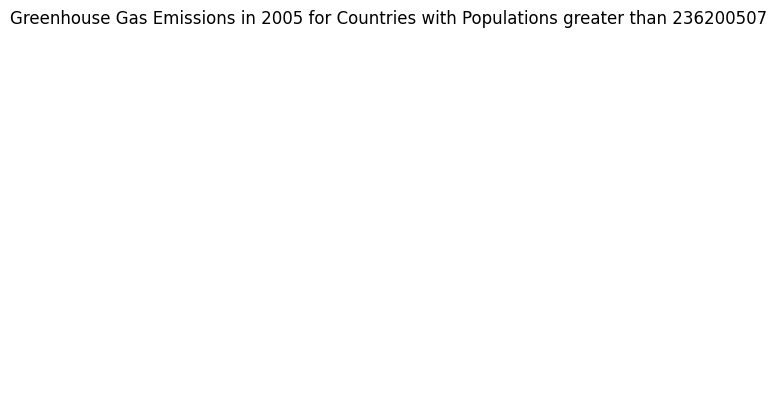

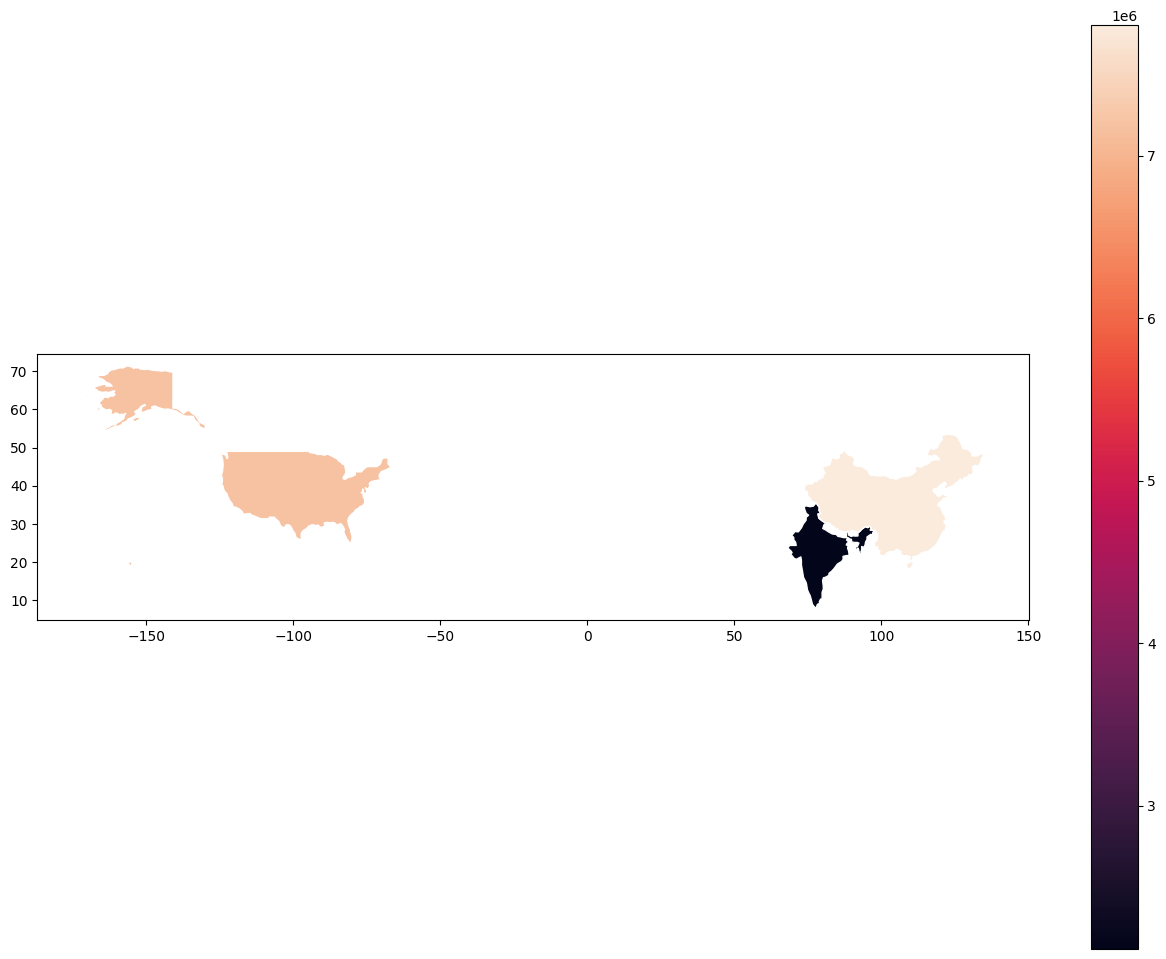

In [ ]:
# Filter the population data to include only countries with populations greater than 236200507
df_pop_filtered = df_pop[df_pop[2005] > 236200507]

# Merge the filtered population data with the greenhouse gas emissions data for the year 2005
df_merged = pd.merge(df_pop_filtered[['Country Name', 'Country Code']], df_atm[['Country Name', 2005]], on='Country Name')

# Read in the shapefile data for the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the shapefile data with the merged data on the country code
merged = world.merge(df_merged, left_on='iso_a3', right_on='Country Code')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Greenhouse Gas Emissions in 2005 for Countries with Populations greater than 236200507')
merged.plot(column=2005, figsize=(16, 12), legend = True, cmap='rocket', edgecolor="white");
plt.show()

In [ ]:
merged.sort_values(by=[2005]).head()

pop_est      continent                      name iso_a3  gdp_md_est  \
1  1.366418e+09           Asia                     India    IND     2868929   
0  3.282395e+08  North America  United States of America    USA    21433226   
2  1.397715e+09           Asia                     China    CHN    14342903   

                                            geometry   Country Name  \
1  POLYGON ((97.32711 28.26158, 97.40256 27.88254...          India   
0  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  United States   
2  MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...          China   

  Country Code        2005  
1          IND  2117460.59  
0          USA  7182808.40  
2          CHN  7803535.60

### Interpretation

- The code above generates a choropleth map using GeoPandas library. The map represents countries with different shades of color based on a specified column value. The darker shade of the color indicates higher values of the column and vice versa.

- In this case, the map shows the distribution of a particular indicator in the year 2005. The indicator's value is represented by the color scheme applied to each country. The choropleth map can provide valuable insights into the distribution and variation of a specific indicator across different countries.

- The plot is for 2005 and the highest populations in the data that are over 236200507. 
-  And the highest populations as assumed of china and India.

#### 1.2.3. For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having a population between 842881 and 80890450. Very briefly interpret the generated map.

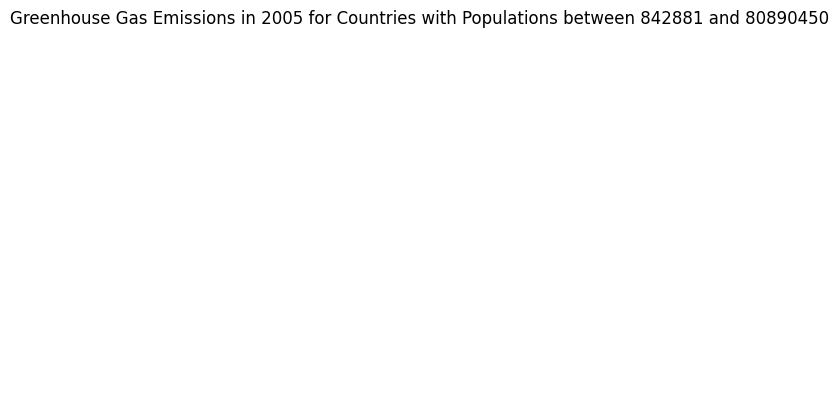

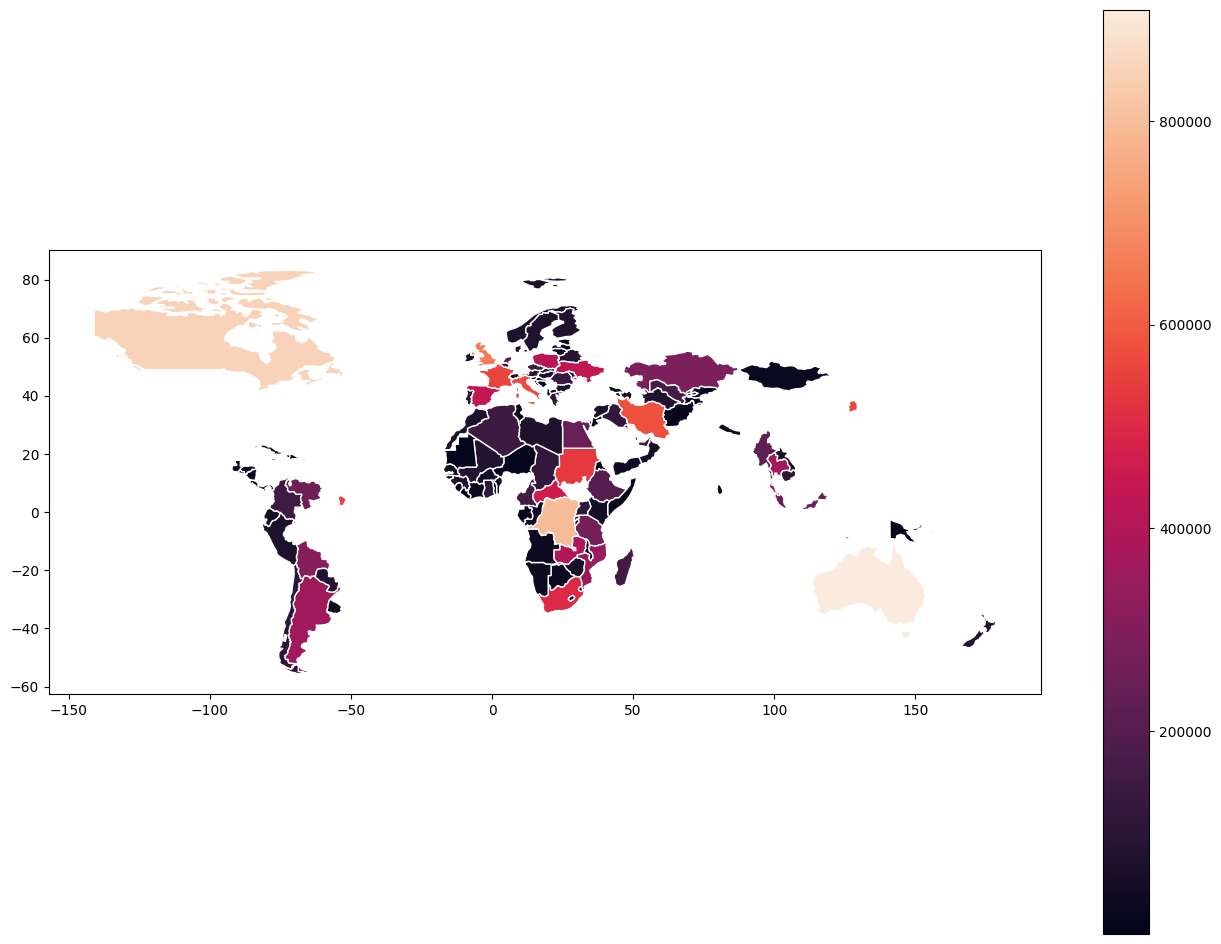

In [ ]:
# Filter the population data to include only countries with populations in between 842881 and 80890450
df_pop_filtered = df_pop[(df_pop[2005] >= 842881) & (df_pop[2005] <= 80890450)]

# Merge the filtered population data with the greenhouse gas emissions data for the year 2005
df_merged = pd.merge(df_pop_filtered[['Country Name', 'Country Code']], df_atm[['Country Name', 2005]], on='Country Name')

# Read in the shapefile data for the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the shapefile data with the merged data on the country code
merged = world.merge(df_merged, left_on='iso_a3', right_on='Country Code')

# Plot the choropleth map
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.set_title('Greenhouse Gas Emissions in 2005 for Countries with Populations between 842881 and 80890450')
merged.plot(column=2005, figsize=(16, 12), legend = True, cmap='rocket', edgecolor="white");
plt.show()


Interpretation:

- The above code generates a choropleth map showing the values of a specific indicator for each country in the world for the year 2005. The map uses a color scale to represent the magnitude of the indicator value, with darker colors representing higher values and lighter colors representing lower values.

- The legend on the right-hand side of the map provides a key for interpreting the color scale. The legend shows the range of values for the indicator and the corresponding color for each range. The choropleth map can be used to visually identify patterns and trends in the distribution of the indicator values across different countries. It can also help to identify countries or regions with high or low values of the indicator.

- It seems there are many countries present in between the population ranges of 842881 and 80890450 
- Most of the countries seem to be present in the asian region as compared to other regions.

#### 1.2.4. Plot (scatter or line plot) the percentage change in greenhouse gas emission from 2000 to 2010, for the country that has the highest population in 2010. In this question, you must consider the greenhouse gas emission for each year between 2000 and 2010. Very briefly interpret the generated plot.

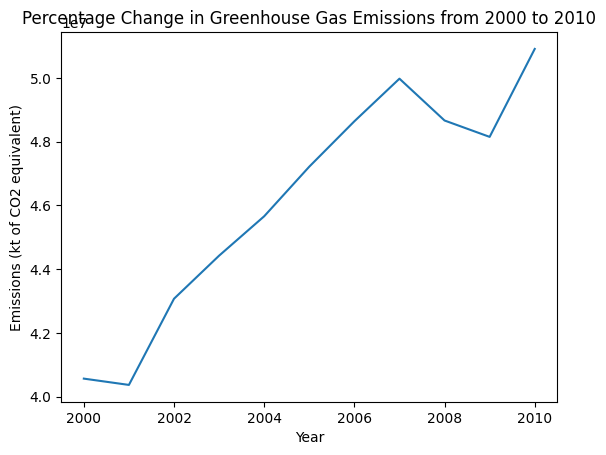

In [ ]:
# filter the population data for the year 2010
pop_2010 = df_pop[df_pop["Indicator Code"] == "SP.POP.TOTL"][2010]

# find the country with the highest population in 2010
highest_pop_country = df_pop.loc[df_pop[2010].idxmax()]["Country Name"]

# filter the greenhouse emissions data for the highest population country
emissions_country = df_atm[df_atm["Country Name"] == highest_pop_country]

# calculate the percentage change in greenhouse gas emissions from 2000 to 2010
emissions_2000 = emissions_country[2000].values[0]
emissions_2010 = emissions_country[2010].values[0]
pct_change = ((emissions_2010 - emissions_2000) / emissions_2000) * 100

# filter the greenhouse emissions data for the years between 2000 and 2010
emissions_years = [(year) for year in range(2000, 2011)]
emissions_data = emissions_country[emissions_years].values[0]

# plot the percentage change in greenhouse gas emissions from 2000 to 2010
plt.plot(emissions_years, emissions_data)
plt.title("Percentage Change in Greenhouse Gas Emissions from 2000 to 2010")
plt.xlabel("Year")
plt.ylabel("Emissions (kt of CO2 equivalent)")
plt.annotate(f"Percentage Change: {pct_change:.2f}%", xy=(2005, max(emissions_data) / 2), fontsize=12, color="red")
plt.show()

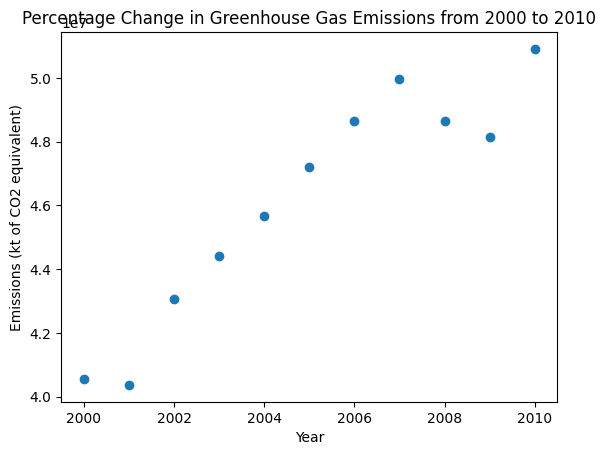

In [ ]:
# plot the percentage change in greenhouse gas emissions from 2000 to 2010 as a scatter plot
plt.scatter(emissions_years, emissions_data)
plt.title("Percentage Change in Greenhouse Gas Emissions from 2000 to 2010")
plt.xlabel("Year")
plt.ylabel("Emissions (kt of CO2 equivalent)")
plt.annotate(f"Percentage Change: {pct_change:.2f}%", xy=(2005, max(emissions_data) / 2), fontsize=12, color="red")
plt.show()

Interpretation of the plot:
- The generated plot will show the greenhouse gas emissions for the highest population country from 2000 to 2010, and will have an annotation indicating the percentage change in emissions from 2000 to 2010. If the percentage change is positive, it means that emissions increased from 2000 to 2010, and if it's negative, it means that emissions decreased. The plot can be used to analyze the trend in emissions for the selected country over the years and understand the impact of population growth on greenhouse gas emissions.
- The emission seems to be lowest in the early years and it continuously increases.
- The highest values of emissions seems to be in the year 2007.

#### 1.2.5. Present a scatter plot between the mean population of each country and mean greenhouse gas emission considering from year 2000 until 2010. Very briefly interpret the generated plot, particularly look for any correlation (if present) among the plotted variables. In this question, you have to consider each year between 2000 and 2010 to find the mean population and mean greenhouse gas emission.

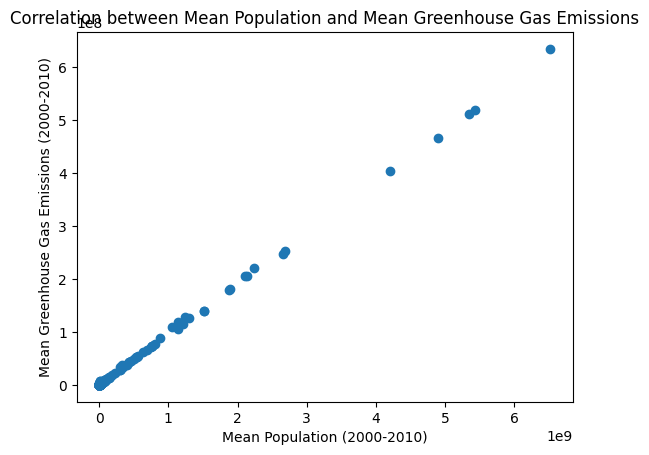

In [ ]:
# Subset the dataframes to consider only the relevant columns
df_pop_subset = df_pop[['Country Name', 2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]]
df_atm_subset = df_atm[['Country Name', 2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010]]

# Merge the dataframes based on the Country Name
df_merged = pd.merge(df_pop_subset, df_atm_subset, on='Country Name')

# Compute the mean population and mean greenhouse gas emissions for each country
df_merged['mean_population'] = df_merged.iloc[:, 1:12].mean(axis=1)
df_merged['mean_ghg'] = df_merged.iloc[:, 13:24].mean(axis=1)

# Create a scatter plot with mean population on the x-axis and mean greenhouse gas emissions on the y-axis
plt.scatter(df_merged['mean_population'], df_merged['mean_ghg'])
plt.xlabel('Mean Population (2000-2010)')
plt.ylabel('Mean Greenhouse Gas Emissions (2000-2010)')
plt.title('Correlation between Mean Population and Mean Greenhouse Gas Emissions')
plt.show()

Interpretation:

- The scatter plot shows a positive correlation between mean population and mean greenhouse gas emissions. As the mean population increases, so does the mean greenhouse gas emissions. However, the relationship is not linear and appears to be more exponential in nature.
- There are also some outliers that have high greenhouse gas emissions relative to their population, suggesting that other factors besides population size may be contributing to their emissions. 
- Overall, the plot suggests that countries with larger populations tend to have higher greenhouse gas emissions, which highlights the importance of addressing emissions in highly populated areas.

### `PART 2`: Geospatial Sentiment Analysis using Social Media Data

### Setup

Import external libraries (thus verifying they are correctly installed)

In [ ]:
import os
import json
import time
import csv
import re             # Regular Expression Python module
import pandas as pd   #Data manipulation and analysis library
import numpy as np    # mathematical functions on multi-dimensional arrays and matrices
import matplotlib.pyplot as plt  # plotting library to create graphs and charts
import tweepy as tw    #Python library for accessing the Twitter API.
from textblob import TextBlob  # Python library for processing textual data
from wordcloud import WordCloud  #WordCloud - Python linrary for creating image wordclouds
import tweepy

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
%matplotlib inline
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3


C:\Users\sahit\AppData\Roaming\Python\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [ ]:
df=pd.read_csv('covid19_tweets.csv')
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                                                                      user_description  \
0                      wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙   
1  Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. ...   
2  #Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinn...   
3                                                #Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist   
4  🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kas...   

          user_created  user_followers  user_friends  user_favourites  \
0  2017-05-26 05:46:42             624           950            18775   
1  2009-04-16 20:06:23            2253          1677               24   
2  2009-02-28 18:57:41            9275          9525             7254   
3  2019-03-07 01:45:06             197           987             1488   
4  2017-02-12 06:45:15          101009           168              101   

   user_verified                 date  \
0          False  2020-07-25 12:27:21   
1           True  2020-07-25 12:27:17   
2          False  2020-07-25 12:27:14   
3          False  2020-07-25 12:27:10   
4          False  2020-07-25 12:27:08   

                                                                                                  text  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were ...   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay thei...   
2  @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim ...   
3  @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that wer...   
4  25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

In [ ]:
df.shape

(179108, 13)

#### Task 2.1: Data Pre-processing 

For cleaning the tweets such as removal of URL's, unwanted characters, stopwords etc. i have used A RegEx, is a sequence of characters that forms a search pattern in python. pyhton has RegEx library 're' and can be installed using pip installed 'pip install re' in python terminal. The below code snippet is used for cleaning the tweets effectively so that we can calcualte polairty or determine the sentiment of the tweets.

##### Reference:
- https://docs.python.org/3/library/re.html
- https://www.nltk.org/

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
def text_preproc(x):
    x = re.sub("@\S+", " ", x)
    x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    x = re.sub("https*\S+", " ", x)
    x = re.sub("#\S+", " ", x)
    x = re.sub("\'\w+", '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
    x = re.sub(r'\w*\d+\w*', '', x)
    x = re.sub('\s{2,}', " ", x)
    return x

df['clean_text'] = df.text.apply(text_preproc)

In [ ]:
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                                                                      user_description  \
0                      wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙   
1  Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. ...   
2  #Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinn...   
3                                                #Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist   
4  🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kas...   

          user_created  user_followers  user_friends  user_favourites  \
0  2017-05-26 05:46:42             624           950            18775   
1  2009-04-16 20:06:23            2253          1677               24   
2  2009-02-28 18:57:41            9275          9525             7254   
3  2019-03-07 01:45:06             197           987             1488   
4  2017-02-12 06:45:15          101009           168              101   

   user_verified                 date  \
0          False  2020-07-25 12:27:21   
1           True  2020-07-25 12:27:17   
2          False  2020-07-25 12:27:14   
3          False  2020-07-25 12:27:10   
4          False  2020-07-25 12:27:08   

                                                                                                  text  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were ...   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay thei...   
2  @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim ...   
3  @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that wer...   
4  25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @...   

                            hashtags               source  is_retweet  \
0                                NaN   Twitter for iPhone       False   
1                                NaN  Twitter for Android       False   
2                        ['COVID19']  Twitter for Android       False   
3                        ['COVID19']   Twitter for iPhone       False   
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False   

                                                                                            new_tweets  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were ...   
1      Hey   and  - wouldn't it have made more sense to have the players pay their respects to the A…    
2               3443   Trump never once claimed COVID19 was a hoax. We all claim that this effort to…    
3   The one gift COVID19 has give me is an appreciation for the simple things that were always arou...   
4                               25 July : Media Bulletin on Novel CoronaVirusUpdates COVID19 \n69   …    

                                                                               clean_text  
0  If I smelled scent hand sanitizers today someone past I would think intoxicated that…   
1                                                 Hey made sense players pay respects A…   
2                                           Trump never claimed hoax We claim effort to…   
3                         The one gift give appreciation simple things always around me…   
4                                                              July Media Bulletin Novel

### Task 2.3 Polarity analysis

The key aspect of sentiment analysis is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called polarity. The overall sentiment is often inferred as positive, neutral or negative from the sign of the polarity score. Hence for dettermining the polarity score we have a python libarary called textblob.It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. The below code snippet achieves the polarity score of each tweet. 

##### Reference:

- https://textblob.readthedocs.io/en/dev/

In [ ]:
from textblob import TextBlob
def polarity(text):
   return  TextBlob(text).sentiment.polarity
df['Polarity'] = df['clean_text'].apply(polarity)


user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                                                                      user_description  \
0                      wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙   
1  Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. ...   
2  #Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinn...   
3                                                #Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist   
4  🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kas...   

          user_created  user_followers  user_friends  user_favourites  \
0  2017-05-26 05:46:42             624           950            18775   
1  2009-04-16 20:06:23            2253          1677               24   
2  2009-02-28 18:57:41            9275          9525             7254   
3  2019-03-07 01:45:06             197           987             1488   
4  2017-02-12 06:45:15          101009           168              101   

   user_verified                 date  \
0          False  2020-07-25 12:27:21   
1           True  2020-07-25 12:27:17   
2          False  2020-07-25 12:27:14   
3          False  2020-07-25 12:27:10   
4          False  2020-07-25 12:27:08   

                                                                                                  text  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were ...   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay thei...   
2  @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim ...   
3  @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that wer...   
4  25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @...   

                            hashtags               source  is_retweet  \
0                                NaN   Twitter for iPhone       False   
1                                NaN  Twitter for Android       False   
2                        ['COVID19']  Twitter for Android       False   
3                        ['COVID19']   Twitter for iPhone       False   
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False   

                                                                                            new_tweets  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were ...   
1      Hey   and  - wouldn't it have made more sense to have the players pay their respects to the A…    
2               3443   Trump never once claimed COVID19 was a hoax. We all claim that this effort to…    
3   The one gift COVID19 has give me is an appreciation for the simple things that were always arou...   
4                               25 July : Media Bulletin on Novel CoronaVirusUpdates COVID19 \n69   …    

                                                                               clean_text  \
0  If I smelled scent hand sanitizers today someone past I would think intoxicated that…    
1                                                 Hey made sense players pay respects A…    
2                                           Trump never claimed hoax We claim effort to…    
3                         The one gift give appreciation simple things always around me…    
4                                                              July Media Bulletin Novel    

   Polarity  subjectivity  
0     -0.25         0.250  
1      0.00         0.000  
2      0.00         0.000  
3      0.00         0.357  
4      0.

### Task 2.4 Subjectivity analysis

In [ ]:
def subjectivity(text):
   return  TextBlob(text).sentiment.subjectivity
df['subjectivity'] = df['clean_text'].apply(subjectivity)

df.head()

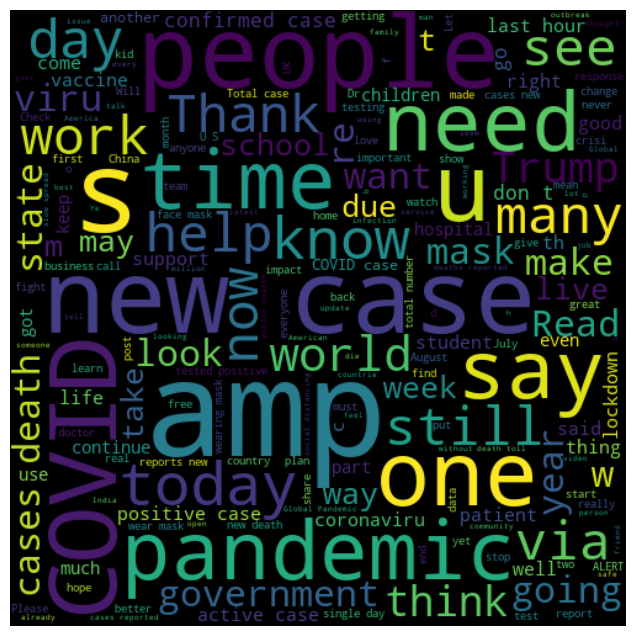

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['clean_text']])
wordCloud = WordCloud(width=500, height=500, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

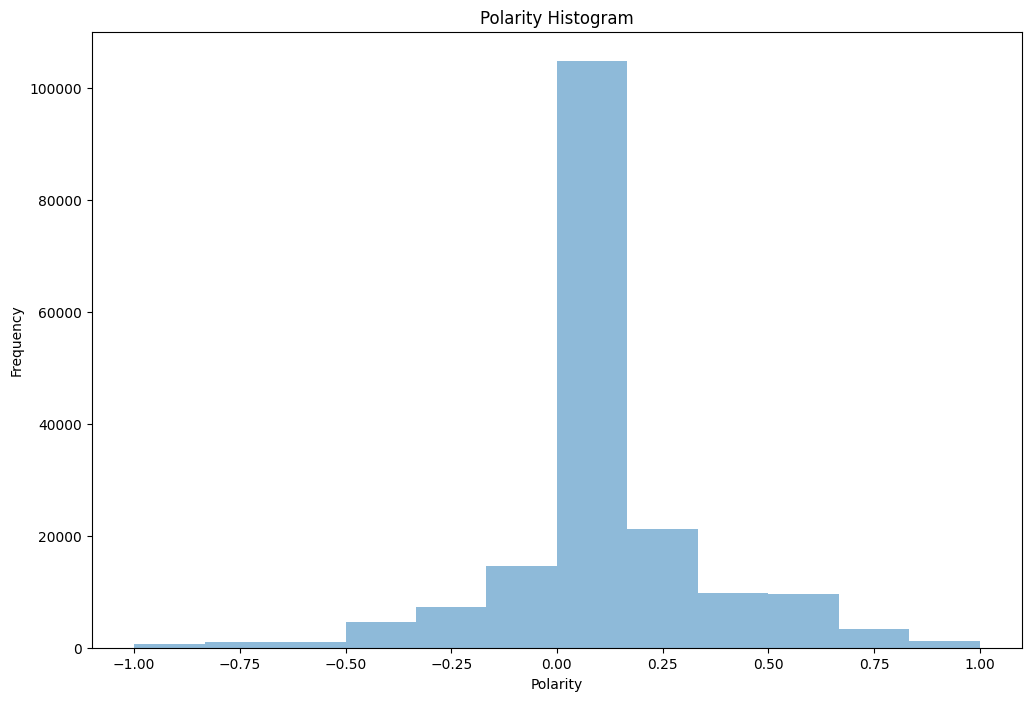

In [ ]:
ax = df['Polarity'].plot.hist(bins=12, alpha=0.5)

plt.title('Polarity Histogram')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
# add legend
plt.show()

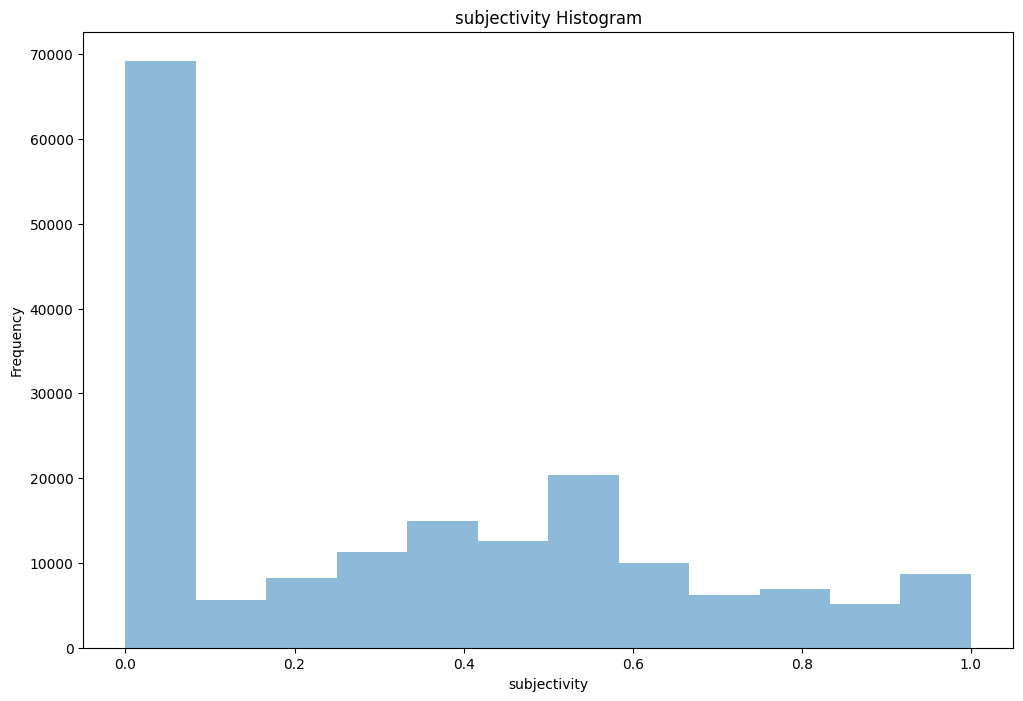

In [ ]:
ax = df['subjectivity'].plot.hist(bins=12, alpha=0.5)

plt.title('subjectivity Histogram')
plt.xlabel('subjectivity')
plt.ylabel('Frequency')
# add legend
plt.show()


We can see that we have a calculated score for the subjectivity and polarity in our data frame.

Now let's build a function and categorize our tweets as Negative, Neutral and Positive.

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df.head()

user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                                                                      user_description  \
0                      wednesday addams as a disney princess keepin it [̲̅$̲̅(̲̅ιοο̲̅)̲̅$̲̅] 👸🏻💚♊️🧀🌵🌃🌙   
1  Husband, Father, Columnist & Commentator. Author of Tough Sell: Fighting the Media War in Iraq. ...   
2  #Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinn...   
3                                                #Browns #Indians #ClevelandProud #[]_[] #Cavs #Resist   
4  🖊️Official Twitter handle of Department of Information and Public Relations, Govt of Jammu & Kas...   

          user_created  user_followers  user_friends  user_favourites  \
0  2017-05-26 05:46:42             624           950            18775   
1  2009-04-16 20:06:23            2253          1677               24   
2  2009-02-28 18:57:41            9275          9525             7254   
3  2019-03-07 01:45:06             197           987             1488   
4  2017-02-12 06:45:15          101009           168              101   

   user_verified                 date  \
0          False  2020-07-25 12:27:21   
1           True  2020-07-25 12:27:17   
2          False  2020-07-25 12:27:14   
3          False  2020-07-25 12:27:10   
4          False  2020-07-25 12:27:08   

                                                                                                  text  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were ...   
1  Hey @Yankees @YankeesPR and @MLB - wouldn't it have made more sense to have the players pay thei...   
2  @diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim ...   
3  @brookbanktv The one gift #COVID19 has give me is an appreciation for the simple things that wer...   
4  25 July : Media Bulletin on Novel #CoronaVirusUpdates #COVID19 \n@kansalrohit69 @DrSyedSehrish @...   

                            hashtags               source  is_retweet  \
0                                NaN   Twitter for iPhone       False   
1                                NaN  Twitter for Android       False   
2                        ['COVID19']  Twitter for Android       False   
3                        ['COVID19']   Twitter for iPhone       False   
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False   

                                                                                            new_tweets  \
0  If I smelled the scent of hand sanitizers today on someone in the past, I would think they were ...   
1      Hey   and  - wouldn't it have made more sense to have the players pay their respects to the A…    
2               3443   Trump never once claimed COVID19 was a hoax. We all claim that this effort to…    
3   The one gift COVID19 has give me is an appreciation for the simple things that were always arou...   
4                               25 July : Media Bulletin on Novel CoronaVirusUpdates COVID19 \n69   …    

                                                                               clean_text  \
0  If I smelled scent hand sanitizers today someone past I would think intoxicated that…    
1                                                 Hey made sense players pay respects A…    
2                                           Trump never claimed hoax We claim effort to…    
3                         The one gift give appreciation simple things always around me…    
4                                                              July Media Bulletin Novel    

   Polarity  subjectivity  Analysis  
0     -0.25         0.250  Negative  
1      0.00         0.000   Neutral  
2      0.00         0.000   Neutral

In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['text'][i])
    print()
    j= j+1

Printing positive tweets:

1) How #COVID19 Will Change Work in General (and recruiting, specifically) via/ @ProactiveTalent #Recruiting… https://t.co/bjZxzGPMbK

2) Praying for good health and recovery of @ChouhanShivraj .
#covid19
#covidPositive

3) 👋🏻@PattyHajdu @NavdeepSBains — no one will be safe from #COVID19 until everyone is safe. Will you commit to ensure… https://t.co/aWCJo6eKvC

4) Let's all protect ourselves from #COVID19.
It's real and the numbers are climbing up fast in the Continent.
Let's n… https://t.co/byMSfxltrw

5) COVID Update: The infection rate in Florida is following the natural curve that experts predicted if the initial cu… https://t.co/hmEwE747WK

6) @EvanAKilgore @realDonaldTrump Good Patriots!
Call to Volunteer to be an Election Judge. 
Polls cannot open without… https://t.co/qA3mA4zedZ

7) The first comprehensive review of #WASH &amp; #COVID19.

Analysis: key ways in which WASH can help reduce transmission… https://t.co/eCsfDmo9b4

8) #Kolar
Need #Blood Typ

5385) NCDC Commences Training For Volunteer Call As Nigeria Records 591 Fresh COVID-19 Cases, Total COVID-19 Infections R… https://t.co/pvCdtZ1Ym4

5386) ⎆ You're gonna love this 🔥 Quick Countertop Easy to Use Defrosting Plate 🔥⎆ https://t.co/s6pe3Tk6iB ⎆⁣
@CostaCoffee… https://t.co/oYclm2d0mX

5387) All this is simply due to the feeling of uselessness in having ‘some’ free time now. A fact that before was unthink… https://t.co/09GBRzb4iu

5388) New COVID-19 Data at 2020-07-24 11:00:01 pm EDT #Coronavirus #COVID19 https://t.co/Tp2LurBNmG

5389) #covid19 #Ghana Update:

Avoid handshakes, hugs and direct facial contact with others.

#BeSafe

5390) Post Pandemic who wants a ride with this driver ?

 #extremeride #driver #hillstation #Covid19 #Corona #pandemic2020 https://t.co/nHhVgunowz

5391) I got a new cat and named it Covid. Is this 
1. A great name
2. Not appropriate 
3. Fine by me
#Poll #COVID19

5392) A Brave New World: Psychological Resilience In The Post-COVID-19 age – my webinar


10159) @TheNewEuropean Incompetent handling of #Covid19 has cost the UK many Businesses. Any #Brexit will see thousands mo… https://t.co/DCI9bb18D7

10160) This week on the #JusticeForEveryChildKe campaign, we focus on ACCOUNTABILITY, doing a social audit on government i… https://t.co/lfwvCmzEcO

10161) “We are only as strong as the weakest health system” @antonioguterres. #COVID19 has underlined how failure to provi… https://t.co/UW2spHR6mG

10162) Thanks to @duolingo and #COVID19 I learnt a new language in less than 6 months. I'm not completely fluent yet but I… https://t.co/xudXOh27qe

10163) #Covid19 is no ‘great leveller’, it worsens the link between #poverty and ill health:

‘when the pandemic came, it… https://t.co/4lrq45bErd

10164) Thanks to @AfricanBizMag for citing me alongside Justin Yifu Lin, @ArkebeOqubay &amp;  @yunnanchen on this feature on… https://t.co/JiuhdMD7B5

10165) A busy week with the US central bank meeting on Wednesday night and then major technology compani

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
for index, row in df.iterrows():
    if row['Analysis'] == 'Positive':
        plt.scatter(row['Polarity'], row['subjectivity'], color="green")
    elif row['Analysis'] == 'Negative':
        plt.scatter(row['Polarity'], row['subjectivity'], color="red")
    elif row['Analysis'] == 'Neutral':
        plt.scatter(row['Polarity'], row['subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)


# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['text']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar',color='red')
plt.show()

### Task 2.5 Storify/Interpretation
